In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies." 

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**Q1: It's a lexicalstastical database for Northern Eurasia, it provides a wide wide coverage of the lexicon are
available even for many smaller languages in our target area. This makes it possible to attain near-completeness for a substantial number of concepts.**


Let's read in the wordforms in this dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)


Mounted at /content/drive/


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**Q2: Language_ID: the Internationally recognized iso code that can be used to identify a language. Concept_ID: the conception definitions in German and its catergory. rawIPA:the uniform phonetic transcription of the word in the word form. IPA: the orthographic transcription of the word**

Now let's read in some metadata about the languages.

In [ ]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `Family`, `iso_code`, and `subfamily` columns of the data.

**Q3: Family: The language familty is a group of languages that were descended from a common ancestral proto-language. iso_code: the internationally recognized code that desinate the language. Subfamily: The sub-class of the language family.**


Now let's read in some further data about the concepts.



In [ ]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**Q4: id_nelex: the word concept in German and its word catergory, gloss_en: the concept in English, position in ranking: the ranking of the concept based on number of words sharing the same concept in the database**

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [ ]:
# Problem 1a: rename the approproate columns in the languages and concepts dataframes to make this merge possible.
#your code here
languages=languages.rename(columns={"iso_code": "Language_ID", "glotto_code": "Glottocode"})
concepts=concepts.rename(columns={"id_nelex": "Concept_ID"})
# Problem 1b: Use the merge function to merge the three dataframes into one.
#your code here
wordforms=wordforms.merge(concepts, how='left', on='Concept_ID')
wordforms=wordforms.merge(languages, how='left', on='Language_ID')
display(wordforms)

,Language_ID,Glottocode_x,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments,name,Glottocode_y,family,subfamily,latitude,longitude
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN,Finnish,finn1318,Uralic,Finnic,61.0000,24.450
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate,2,34,"-2,649194",ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN,Finnish,finn1318,Uralic,Finnic,61.0000,24.450
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate,3,149,"-1,995463",nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN,Finnish,finn1318,Uralic,Finnic,61.0000,24.450
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate,4,25,"-2,762589",mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN,Finnish,finn1318,Uralic,Finnic,61.0000,24.450
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate,5,31,"-2,670705",tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN,Finnish,finn1318,Uralic,Finnic,61.0000,24.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate,1012,140,"-2,029052",sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN,Mandarin Chinese,mand1415,Sino-Tibetan,Sinitic,40.0209,116.228
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate,1013,198,"-1,822012",pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN,Mandarin Chinese,mand1415,Sino-Tibetan,Sinitic,40.0209,116.228
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate,1014,235,"-1,715766",pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN,Mandarin Chinese,mand1415,Sino-Tibetan,Sinitic,40.0209,116.228
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate,1015,899,"0,118183",rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN,Mandarin Chinese,mand1415,Sino-Tibetan,Sinitic,40.0209,116.228


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](https://lingpy.org/index.html). We'll start by installing the package.

In [ ]:
!pip install lingpy

     |████████████████████████████████| 590 kB 6.5 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 195 kB 67.7 MB/s 
     |████████████████████████████████| 45 kB 4.7 MB/s 
     |████████████████████████████████| 561 kB 40.8 MB/s 


In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [ ]:
#Problem 2a: Filter our the non-Indo-European languages from the wordforms and languages dataframes
#your code here
wordforms=wordforms[wordforms['family']=='Indo-European']
languages=languages[languages['family']=='Indo-European']
#Problem 2b: Filter our the concepts which appear less than or equal to rank 20 in the concepts dataframe.
max_rank=20
# your code here
concepts=concepts[concepts['position_in_ranking']<=max_rank]
display(concepts)

,number,position_in_ranking,ranking_value,Concept_ID,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
62,63,19,"-2,92383",Wasser::N,water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
203,204,20,"-2,902475",Sohn::N,son,сын,[],[],[],SON,1620,SON,NaN
449,450,12,"-3,008012",Tag::N,day,день,[],[],[],DAY_(NOT_NIGHT),1225,DAY_(NOT_NIGHT),NaN
605,606,17,"-2,945985",hier::ADV,here,здесь,[],[],[],HERE,136,HERE,NaN
608,609,15,"-2,964168",dort::ADV,there,там,[],[],[],THERE,1937,THERE,NaN
619,620,6,"-3,262623",nicht::ADV,not,не,[],[],[],NOT,1240,NOT,NaN
637,638,3,"-3,471809",das::PRN,that,то,[],[],[],THAT,78,THAT,NaN
639,640,5,"-3,345092",ich::PRN,I,я,[],[],[],I,1209,I,NaN
640,641,4,"-3,349547",du::PRN,thou,ты,[],[],[],THOU,1215,THOU,NaN
641,642,8,"-3,216746",er::PRN,he,он,[],[],[],HE_OR_SHE_OR_IT,262,HE_OR_SHE_OR_IT,NaN


Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we we will compute the normalized levenshtein distance between the words for Auge::N (eye in English) for German and English and then similarily for all 19 other concepts. We will then average these values to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [ ]:
import lingpy as lp
import numpy as np

#initialize confusion matrix
confusion= [[0 for j in range(len(languages))] for i in range(len(languages))]


#Problem 3: fill the confusion matrix  using the 
#lp.align.pairwise.edit_dist function from lingpy, on 
#the "IPA" fields for each language.
for index1, language1 in enumerate(languages['Language_ID']):
  for index2, language2 in enumerate(languages['Language_ID']):
    distances=[]
    for concept in concepts["Concept_ID"]:
        word1=wordforms.loc[(wordforms['Concept_ID']==concept) & (wordforms['Language_ID']==language1) ,'IPA'].values[0]
        word2=wordforms.loc[(wordforms['Concept_ID']==concept) & (wordforms['Language_ID']==language2) ,'IPA'].values[0]
        distances.append(lp.align.pairwise.edit_dist(word1,word2,normalized=True))
    if len(distances)!=0:
      confusion[index1][index2]=(sum(distances)/len(distances))
    else:
      confusion[index1][index2]=0
    

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages. 


In [ ]:
import torch.nn as nn
import torch 
a=torch.rand(1,4)
b=torch.rand(4,4)
cos = nn.CosineSimilarity(dim=0)
output=cos(a,b)
print(a)
print(b)
print(output)
print(output.tolist())

tensor([[0.1535, 0.2676, 0.3323, 0.2669]])
tensor([[0.4394, 0.2212, 0.9367, 0.6601],
        [0.4481, 0.7232, 0.8860, 0.5402],
        [0.5189, 0.0269, 0.2250, 0.3441],
        [0.1396, 0.1220, 0.9222, 0.6235]])
tensor([0.9356, 0.7132, 0.9275, 0.9755])
[0.9355999231338501, 0.7131730914115906, 0.9274525046348572, 0.9755107164382935]


In [ ]:
copy=[760, 1494, 731, 354, 1583, 2249, 1642, 1757, 950, 1103,1219]

copy.pop(0)
copy

[1494, 731, 354, 1583, 2249, 1642, 1757, 950, 1103, 1219]

In [ ]:
language_names=list(languages["name"].values)
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_names)

{0: ['Bengali', 'Hindi'],
 2: ['Northern Pashto', 'Ossetian'],
 3: ['Western Farsi', 'Northern Kurdish'],
 6: ['Armenian'],
 7: ['Modern Greek'],
 8: ['Standard Albanian'],
 18: ['Lithuanian',
  'Latvian',
  'Bulgarian',
  'Croatian',
  'Slovene',
  'Slovak',
  'Polish',
  'Czech',
  'Belarusian',
  'Russian',
  'Ukrainian'],
 20: ['Icelandic',
  'Norwegian (Bokmål)',
  'Swedish',
  'Danish',
  'German',
  'Dutch',
  'English'],
 27: ['Irish'],
 28: ['Welsh'],
 29: ['Breton'],
 30: ['Latin'],
 31: ['French'],
 32: ['Catalan', 'Spanish', 'Italian', 'Portuguese', 'Romanian']}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy erros in this clustering?

**Q5: The cluster 0,2,3 are Indo-Iranian, 18 is Balto-Slavic and 20 is Germanic, 27,28,29 are Celtic and 31-32 are Romance languages(Latin is Italic which is parallel to Romance langauges). The problem with this clustering is that Western Farsi and Kurdish weren't clustered with Iranian languages in cluster 2 ,Celtic languages weren't clustered toghether(27-29) and French in addition to Latin weren't clustered with other Italic languages.**


Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


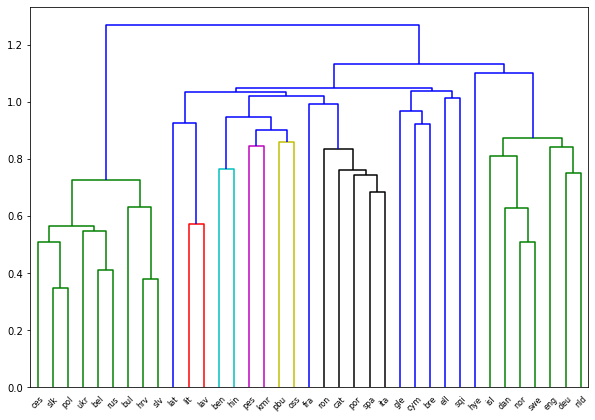

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

#Problem 4: use the linkage function with the average linkage method to compute the clustering.
linked = linkage(confusion, 'average')


#plot the results using dendrogram
def llf(id): return list(languages["Language_ID"].values)[id]
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


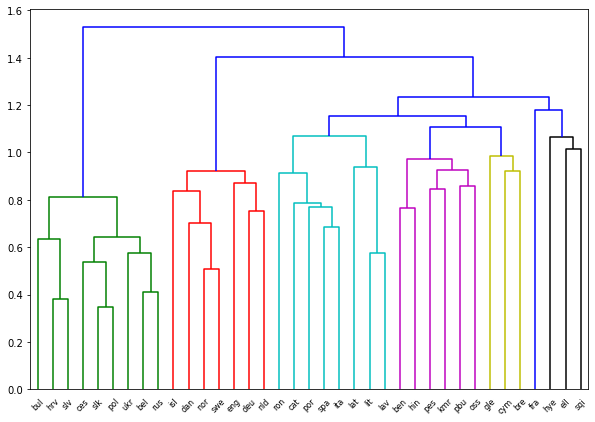

In [ ]:
linked = linkage(confusion, 'complete')


#plot the results using dendrogram
def llf(id): return list(languages["Language_ID"].values)[id]
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


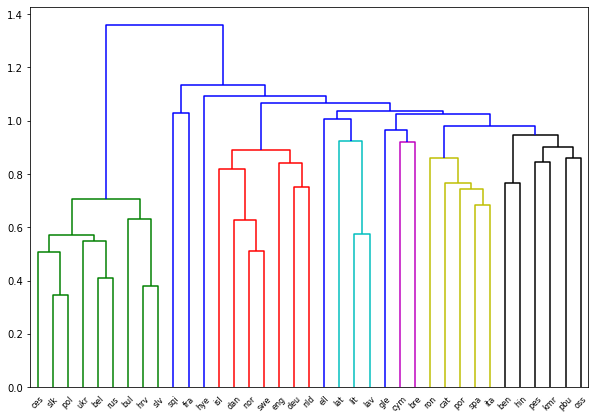

In [ ]:
linked = linkage(confusion, 'weighted')


#plot the results using dendrogram
def llf(id): return list(languages["Language_ID"].values)[id]
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


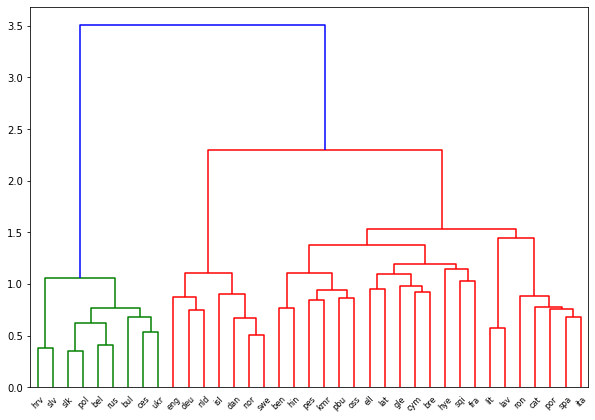

In [ ]:
linked = linkage(confusion, 'ward')


#plot the results using dendrogram
def llf(id): return list(languages["Language_ID"].values)[id]
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy erros in this clustering?

**Q6: This clustering provide accurate clusters for Slavic languages but failed to form the Balto-Slavic cluster(Baltic languages were clustered with Latin(lat) which is an Italic language) and it does cluster French with other Romance languages under this method. Armenian(hye) is also clustered with the Germanic languages which is an error. Greek(ell) and Albanian(sqi) are clustesed with Celtic languages which is an error.**

***Question 7:*** Try three of the other linkage methods and describe how the change the results.

**Q7: The "complete" method clustered Latin with Romance languages but wasn't able to split Baltic languages from Latin and it clustered French with Modern Greek and Albanian. The "weighted" method clustered Greek with the cluster of Latin and Baltic languages and it clustered French with Albanian. The "ward" method clustered Armenian with French and Albanian. Clearly all these methods failed to classify the cluster for French, Albanian, Modern Greek and Armenian.**


***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**Q8: The height for two legs in the U links changed because of the increase in the concepts come with more accurate average distance.**